In [1]:
import pandas as pd
import os
import numpy as np
import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle

In [2]:
df_1=pd.read_csv("C:/Users/USER/Desktop/Singapore_Data_sets/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [3]:
df_2=pd.read_csv("C:/Users/USER/Desktop/Singapore_Data_sets/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
df_3=pd.read_csv("C:/Users/USER/Desktop/Singapore_Data_sets/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_3

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [5]:
df_4=pd.read_csv("C:/Users/USER/Desktop/Singapore_Data_sets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_4

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
185131,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 01 month,865000.0
185132,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63 years 01 month,880000.0
185133,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
185134,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0


In [6]:
df_4['remaining_lease']=df_4['remaining_lease'].str.split(' ').str[0].astype(int)
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [7]:
df_5=pd.read_csv("C:/Users/USER/Desktop/Singapore_Data_sets/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [8]:
#Merge All Datas and convert to Dataframe:

Sin_Flat=pd.concat([df_1,df_2,df_3,df_4,df_5], ignore_index=True)
Sin_Flat

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931334,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
931335,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
931336,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
931337,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [9]:
Sin_Flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931339 entries, 0 to 931338
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931339 non-null  object 
 1   town                 931339 non-null  object 
 2   flat_type            931339 non-null  object 
 3   block                931339 non-null  object 
 4   street_name          931339 non-null  object 
 5   storey_range         931339 non-null  object 
 6   floor_area_sqm       931339 non-null  float64
 7   flat_model           931339 non-null  object 
 8   lease_commence_date  931339 non-null  int64  
 9   resale_price         931339 non-null  float64
 10  remaining_lease      222289 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.2+ MB


In [10]:
Sin_Flat.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
#Spliting colums
Sin_Flat[['year','month']] = Sin_Flat['month'].str.split('-',expand=True) #split the year in the month column
Sin_Flat['block'] = Sin_Flat['block'].str.split(r'(\D)', expand=True)[0].astype('int64') #r'(\D)' splits a string at the first non-digit character.

Sin_Flat[['storey_start','storey_end']] = Sin_Flat['storey_range'].str.split('TO',expand=True) #split the storeyrange

#changing the following columns into numeric
Sin_Flat['month']=pd.to_numeric(Sin_Flat['month'])
Sin_Flat['year']=pd.to_numeric(Sin_Flat['year'])
Sin_Flat['floor_area_sqm']=pd.to_numeric(Sin_Flat['floor_area_sqm'])
Sin_Flat['resale_price']=pd.to_numeric(Sin_Flat['resale_price'])
Sin_Flat['storey_start']=pd.to_numeric(Sin_Flat['storey_start'])
Sin_Flat['storey_end']=pd.to_numeric(Sin_Flat['storey_end'])

Sin_Flat.drop(columns='storey_range',inplace=True)

Sin_Flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931339 entries, 0 to 931338
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931339 non-null  int64  
 1   town                 931339 non-null  object 
 2   flat_type            931339 non-null  object 
 3   block                931339 non-null  int64  
 4   street_name          931339 non-null  object 
 5   floor_area_sqm       931339 non-null  float64
 6   flat_model           931339 non-null  object 
 7   lease_commence_date  931339 non-null  int64  
 8   resale_price         931339 non-null  float64
 9   remaining_lease      222289 non-null  float64
 10  year                 931339 non-null  int64  
 11  storey_start         931339 non-null  int64  
 12  storey_end           931339 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.4+ MB


In [12]:
Sin_Flat.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [13]:
#handle the null values 
Sin_Flat['remaining_lease'].fillna(99-(Sin_Flat['year'] - Sin_Flat['lease_commence_date']), inplace=True)

mask = Sin_Flat['remaining_lease']>99
Sin_Flat = Sin_Flat[~mask]  #remaining_lease exceeds 99 years- are unrealistic.

In [14]:
Sin_Flat.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [15]:
Sin_Flat.describe()

,month,block,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end
count,931288.000000,931288.000000,931288.000000,931288.000000,9.312880e+05,931288.000000,931288.000000,931288.000000,931288.000000
mean,6.550469,348.826498,95.686561,1988.320466,3.220833e+05,80.967955,2006.249017,6.687037,8.701722
std,3.406050,255.114585,25.816626,10.708771,1.716945e+05,10.824885,9.375774,4.827212,4.827192
min,1.000000,1.000000,28.000000,1966.000000,5.000000e+03,41.000000,1990.000000,1.000000,3.000000
25%,4.000000,127.000000,73.000000,1981.000000,1.940000e+05,74.000000,1999.000000,4.000000,6.000000
50%,7.000000,302.000000,93.000000,1986.000000,2.980000e+05,83.000000,2005.000000,7.000000,9.000000
75%,10.000000,534.000000,113.000000,1996.000000,4.200000e+05,90.000000,2014.000000,10.000000,12.000000
max,12.000000,999.000000,307.000000,2020.000000,1.588000e+06,99.000000,2024.000000,49.000000,51.000000


In [16]:
Sin_Flat.dtypes

month                    int64
town                    object
flat_type               object
block                    int64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [17]:
#Changing dtypes in frame:
Sin_Flat['remaining_lease'] = Sin_Flat['remaining_lease'].astype('float64')

In [18]:
Sin_Flat.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end'],
      dtype='object')

In [19]:
#handle the str error
Sin_Flat['flat_model'] = Sin_Flat['flat_model'].str.upper()
Sin_Flat['flat_type'] = Sin_Flat['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

# Adding a new feature to improve results
Sin_Flat['price_per_sqm'] = Sin_Flat['resale_price'] / Sin_Flat['floor_area_sqm']
Sin_Flat['years_holding'] = Sin_Flat['year'] - Sin_Flat['lease_commence_date']
current_year = datetime.datetime.now().year

In [20]:
Sin_Flat.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,69.0,IMPROVED,1986,147000.0,85.0,2000,7,9,2130.434783,14
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,61.0,IMPROVED,1986,144000.0,85.0,2000,4,6,2360.655738,14
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,159000.0,75.0,2000,7,9,2178.082192,24
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,167000.0,75.0,2000,7,9,2287.671233,24
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,67.0,NEW GENERATION,1976,163000.0,75.0,2000,7,9,2432.835821,24


In [21]:
Sin_Flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931288 entries, 0 to 931338
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931288 non-null  int64  
 1   town                 931288 non-null  object 
 2   flat_type            931288 non-null  object 
 3   block                931288 non-null  int64  
 4   street_name          931288 non-null  object 
 5   floor_area_sqm       931288 non-null  float64
 6   flat_model           931288 non-null  object 
 7   lease_commence_date  931288 non-null  int64  
 8   resale_price         931288 non-null  float64
 9   remaining_lease      931288 non-null  float64
 10  year                 931288 non-null  int64  
 11  storey_start         931288 non-null  int64  
 12  storey_end           931288 non-null  int64  
 13  price_per_sqm        931288 non-null  float64
 14  years_holding        931288 non-null  int64  
dtypes: float64(4), int64(7

In [22]:
Sin_Flat['town'].value_counts()

town
TAMPINES           80270
YISHUN             70357
JURONG WEST        66971
BEDOK              66863
WOODLANDS          65826
ANG MO KIO         52252
HOUGANG            50962
BUKIT BATOK        44684
CHOA CHU KANG      38526
BUKIT MERAH        34508
PASIR RIS          33308
SENGKANG           32797
TOA PAYOH          31674
QUEENSTOWN         28877
GEYLANG            28291
CLEMENTI           28124
BUKIT PANJANG      27811
KALLANG/WHAMPOA    27343
JURONG EAST        24864
SERANGOON          22899
BISHAN             21334
PUNGGOL            20943
SEMBAWANG          13977
MARINE PARADE       8059
CENTRAL AREA        7176
BUKIT TIMAH         2528
LIM CHU KANG          64
Name: count, dtype: int64

In [23]:
Sin_Flat.describe().T

,count,mean,std,min,25%,50%,75%,max
month,931288.0,6.550469,3.406050,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,931288.0,348.826498,255.114585,1.000000,127.000000,302.000000,534.000000,9.990000e+02
floor_area_sqm,931288.0,95.686561,25.816626,28.000000,73.000000,93.000000,113.000000,3.070000e+02
lease_commence_date,931288.0,1988.320466,10.708771,1966.000000,1981.000000,1986.000000,1996.000000,2.020000e+03
resale_price,931288.0,322083.287502,171694.479662,5000.000000,194000.000000,298000.000000,420000.000000,1.588000e+06
remaining_lease,931288.0,80.967955,10.824885,41.000000,74.000000,83.000000,90.000000,9.900000e+01
year,931288.0,2006.249017,9.375774,1990.000000,1999.000000,2005.000000,2014.000000,2.024000e+03
storey_start,931288.0,6.687037,4.827212,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,931288.0,8.701722,4.827192,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,931288.0,3331.738502,1546.556574,161.290323,2294.520548,2966.101695,4220.338983,1.559140e+04


In [24]:
#Polt Functions:
def chart(Sin_Flat, col1,col2):
    for col1, col2 in zip(col1,col2):
        fig, axs = plt.subplots(1,4,figsize=(20,5))

        sns.histplot(data=Sin_Flat, x=col1, kde=True, bins=20, ax=axs[0], color="purple")
        axs[0].set_title(f"{col1} After log Transformation")

        sns.boxplot(data=Sin_Flat, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} After Outliers Handle")

        sns.histplot(data=Sin_Flat, x=col2, kde=True, bins=20, ax=axs[2], color="purple")
        axs[2].set_title(f"{col2} Before log Transformation")

        sns.boxplot(data=Sin_Flat, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} Before Outliers Handle")

        plt.tight_layout()
        plt.show()

In [25]:
#Polt Functions:
def chart(Sin_Flat, col1,col2):
    for col1, col2 in zip(col1,col2):
        fig, axs = plt.subplots(1,2,figsize=(15,5))


        sns.histplot(data=Sin_Flat, x=col2, kde=True, bins=20, ax=axs[0], color="purple")
        axs[0].set_title(f"{col2} Before log Transformation")

        sns.boxplot(data=Sin_Flat, y=col2, ax=axs[1])
        axs[1].set_title(f"{col2} Before Outliers Handle")

        plt.tight_layout()
        plt.show()

In [26]:
#skewness handle with log transformation
Sin_Flat['floor_area_sqm_log'] = np.log(Sin_Flat['floor_area_sqm'])
Sin_Flat['resale_price_log'] = np.log(Sin_Flat['resale_price'])
Sin_Flat['remaining_lease_log']=np.log1p(Sin_Flat['remaining_lease'])
Sin_Flat['price_per_sqm_log'] = np.log(Sin_Flat['price_per_sqm'])

In [27]:
#outliers handle with IQR and cliping method 

def outlier(Sin_Flat, column):
    iqr = Sin_Flat[column].quantile(0.75) - Sin_Flat[column].quantile(0.25)
    upper_threshold = Sin_Flat[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = Sin_Flat[column].quantile(0.25) - (1.5*iqr)
    Sin_Flat[column] = Sin_Flat[column].clip(lower_threshold, upper_threshold)

In [28]:
outlier(Sin_Flat,'floor_area_sqm_log')
outlier(Sin_Flat,'resale_price_log')
outlier(Sin_Flat,'price_per_sqm_log')
outlier(Sin_Flat,'remaining_lease_log')

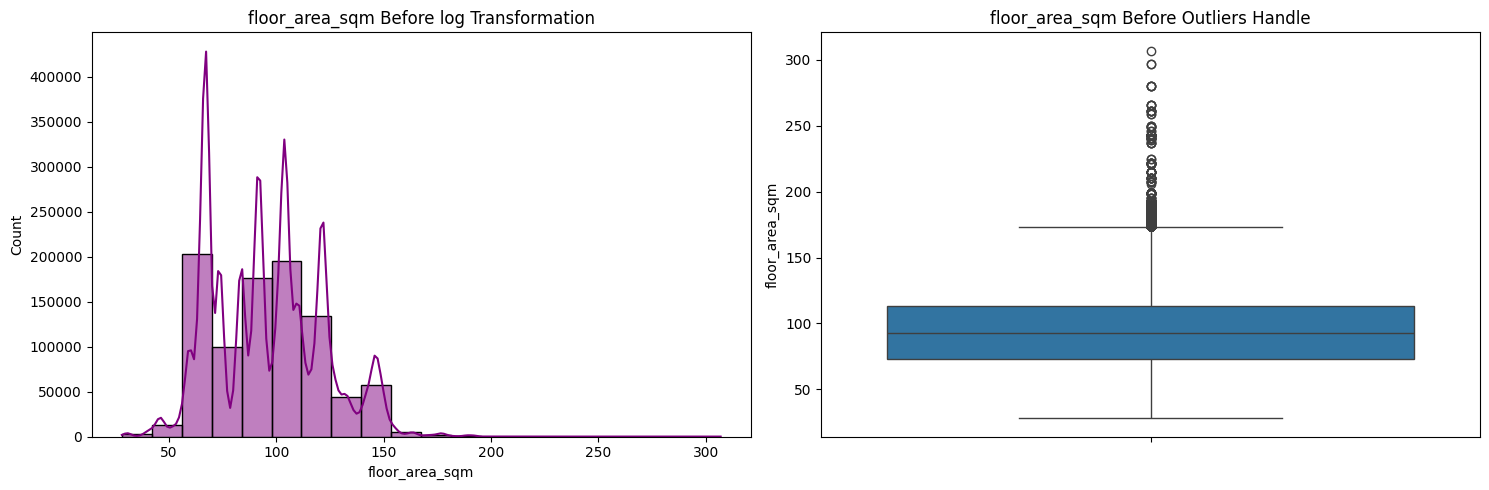

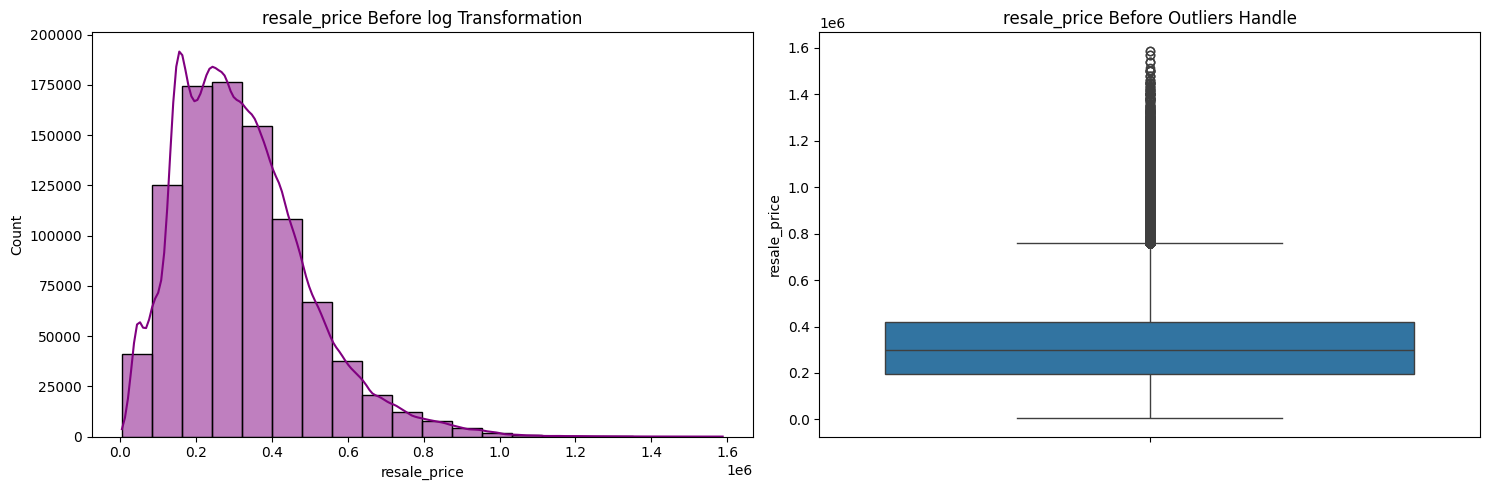

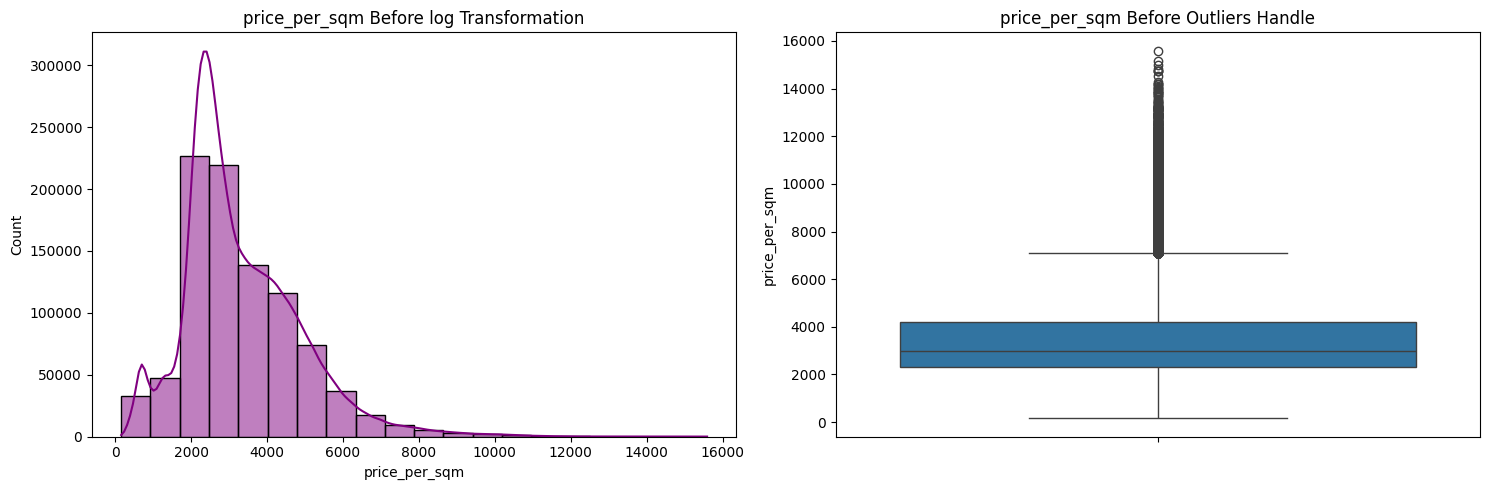

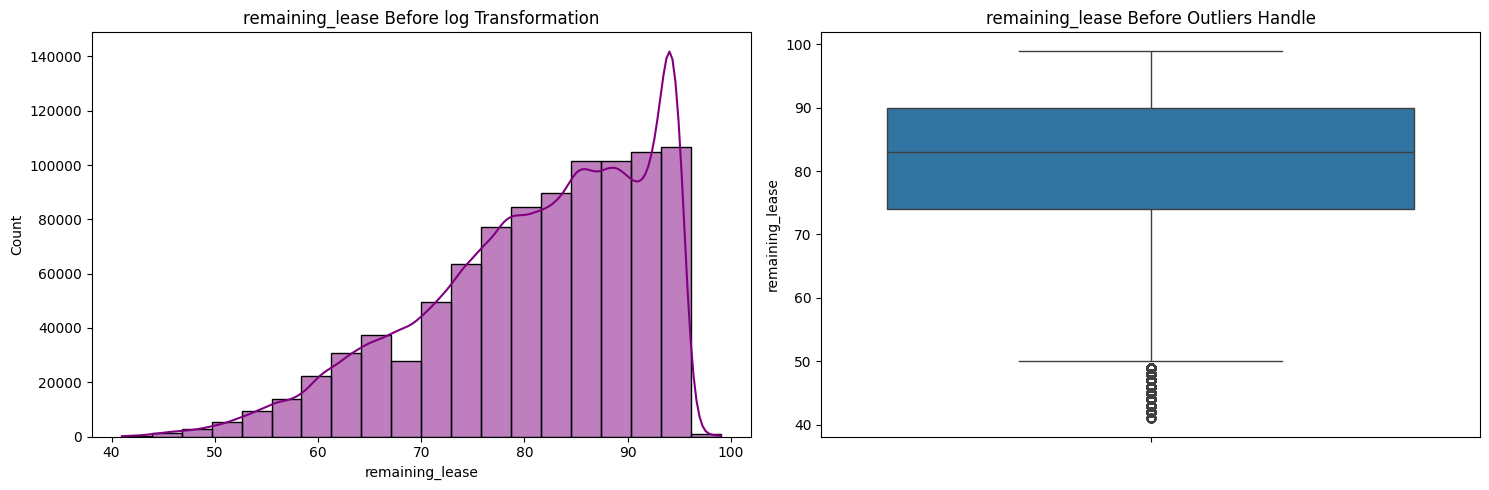

In [29]:
col1=['floor_area_sqm_log','resale_price_log','price_per_sqm_log','remaining_lease_log']
col2=['floor_area_sqm','resale_price','price_per_sqm','remaining_lease']

chart(Sin_Flat, col1,col2)

In [30]:
#Polt Functions:
def chart(Sin_Flat, col1,col2):
    for col1, col2 in zip(col1,col2):
        fig, axs = plt.subplots(1,2,figsize=(20,5))

        sns.histplot(data=Sin_Flat, x=col1, kde=True, bins=20, ax=axs[0], color="purple")
        axs[0].set_title(f"{col1} After log Transformation")

        sns.boxplot(data=Sin_Flat, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} After Outliers Handle")

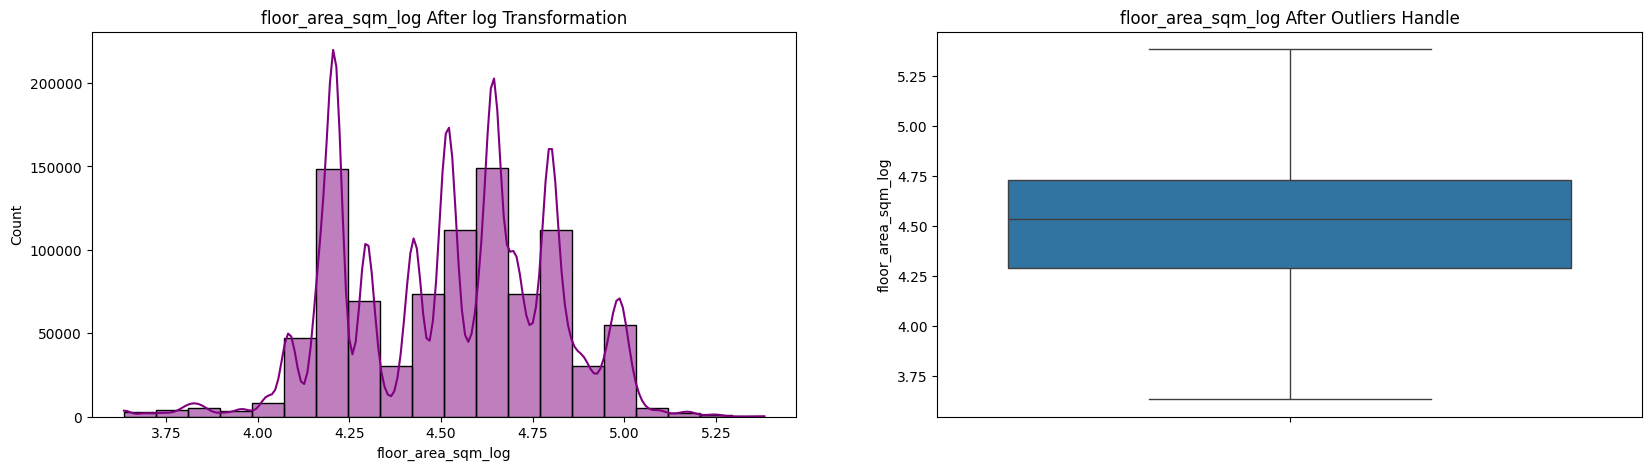

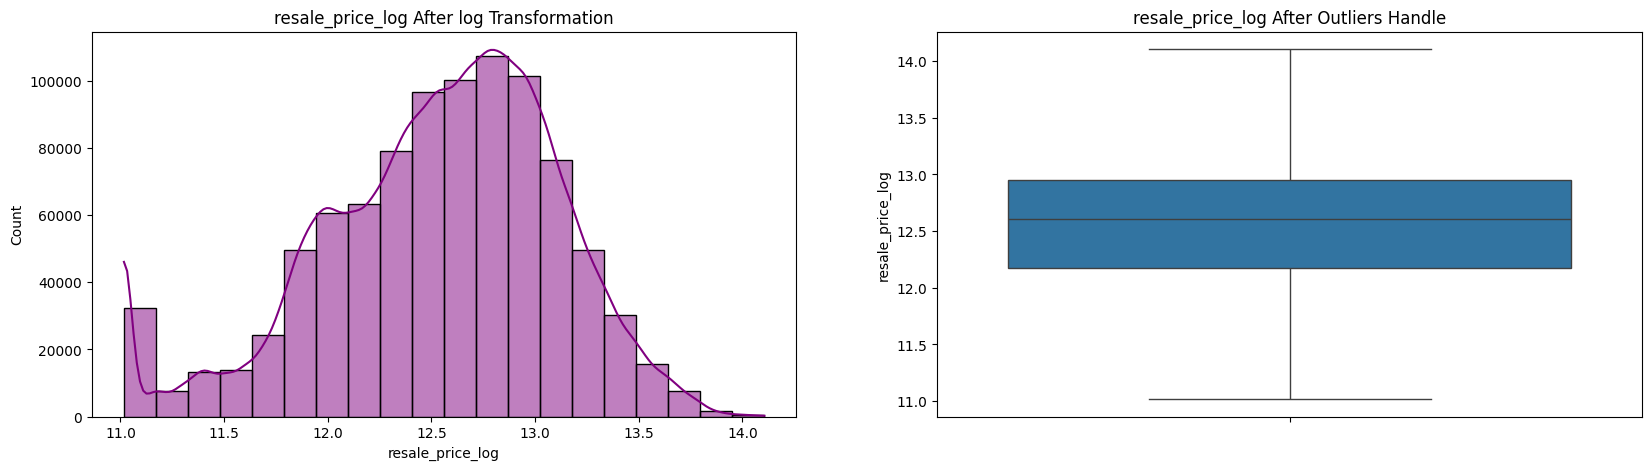

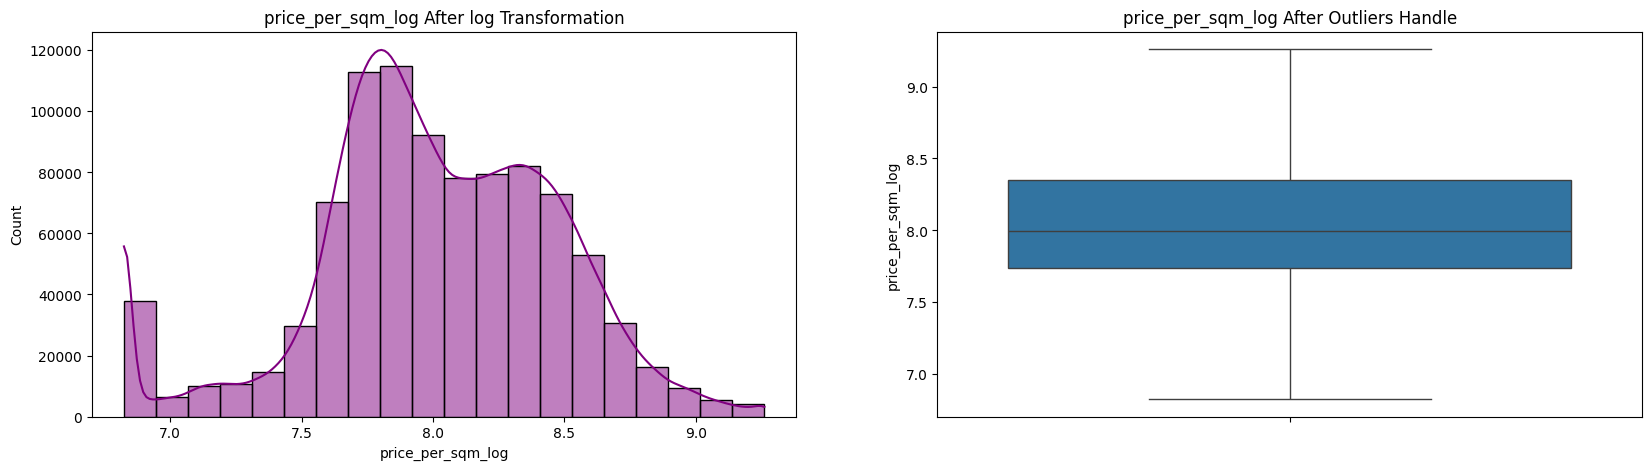

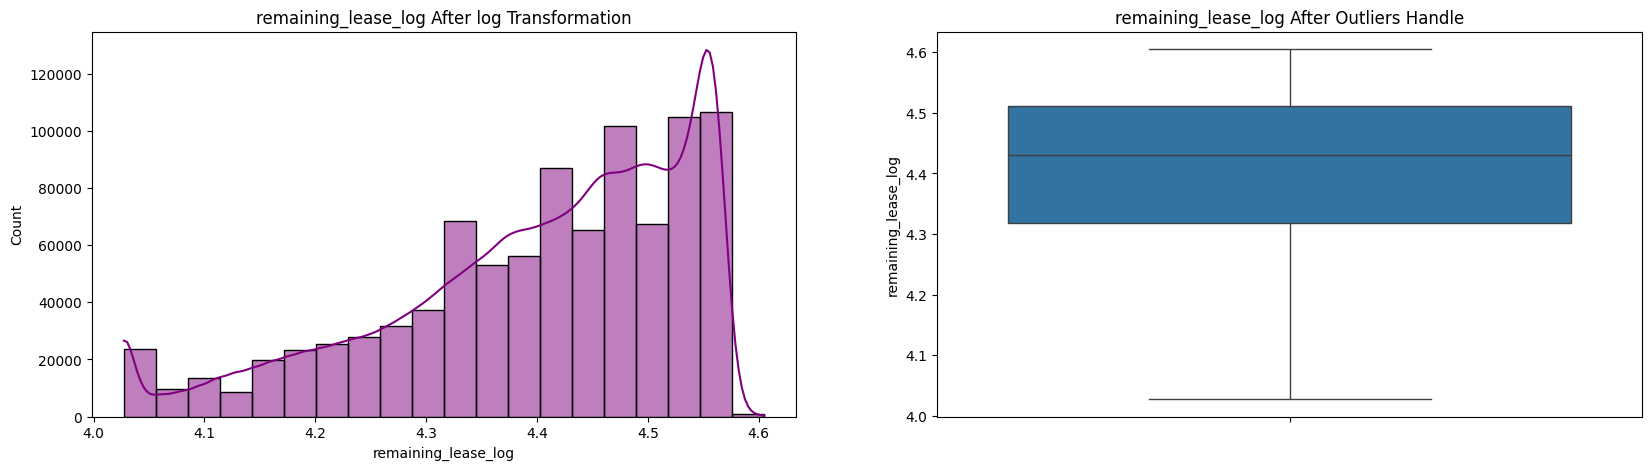

In [31]:
col1=['floor_area_sqm_log','resale_price_log','price_per_sqm_log','remaining_lease_log']
col2=['floor_area_sqm','resale_price','price_per_sqm','remaining_lease']

chart(Sin_Flat, col1,col2)

In [32]:
Sin_Flat.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'storey_start', 'storey_end', 'price_per_sqm', 'years_holding',
       'floor_area_sqm_log', 'resale_price_log', 'remaining_lease_log',
       'price_per_sqm_log'],
      dtype='object')

In [33]:
#drop the columns 
Sin_Flat.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)

In [34]:
Sin_Flat.columns

Index(['month', 'town', 'flat_type', 'block', 'flat_model',
       'lease_commence_date', 'year', 'storey_start', 'storey_end',
       'years_holding', 'floor_area_sqm_log', 'resale_price_log',
       'remaining_lease_log', 'price_per_sqm_log'],
      dtype='object')

Correlation Barplot

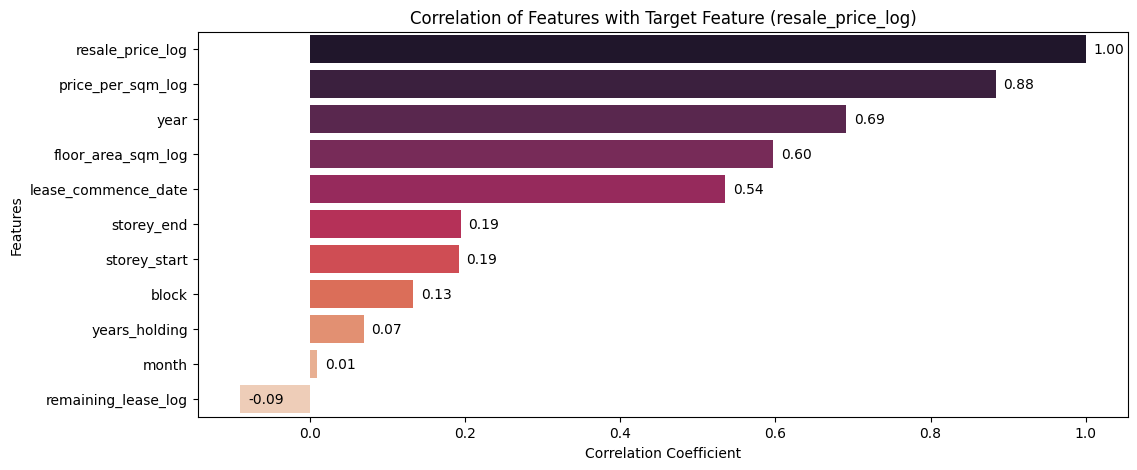

In [35]:
#Correlation of Features with barplot

corr_plt = Sin_Flat[['month', 'block', 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
                    'year', 'storey_start', 'storey_end', 'price_per_sqm_log', 'years_holding']].corr()

target_corr = corr_plt['resale_price_log'].sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=target_corr.values, y=target_corr.index, palette='rocket')
plt.title('Correlation of Features with Target Feature (resale_price_log)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Annotate bars with correlation values
for i, v in enumerate(target_corr.values):
    ax.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.show()

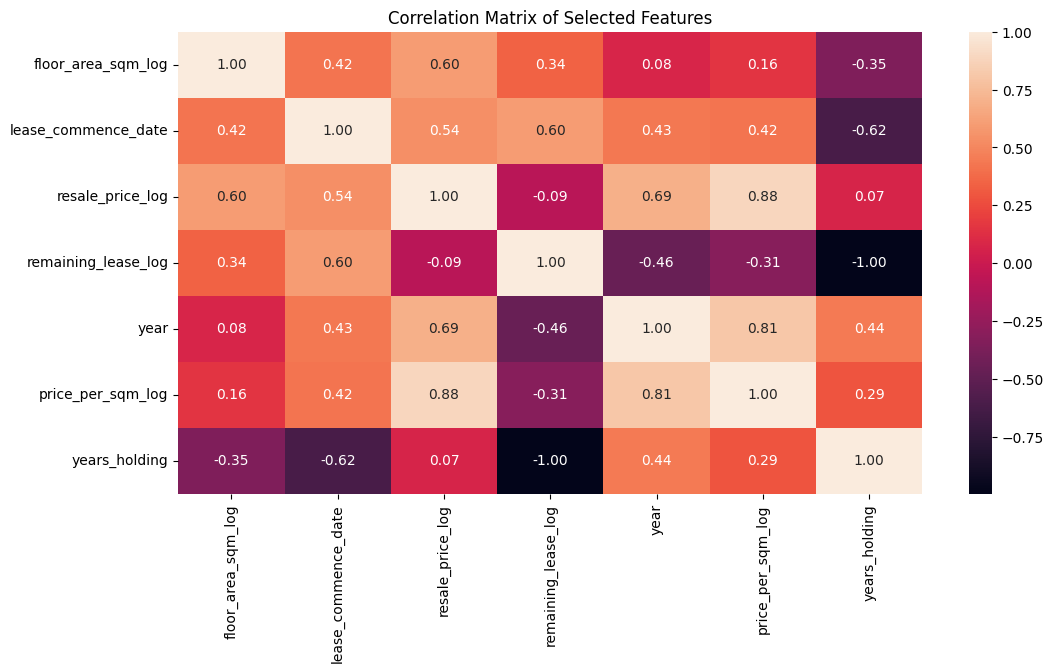

In [36]:
#  correlation analysis - Heatmap
selected_cols = [ 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
                 'year', 'price_per_sqm_log', 'years_holding']

# Calculating the correlation matrix
corr_matrix = Sin_Flat[selected_cols].corr()

# Creating a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

DATA MODELING

In [37]:
df_final=Sin_Flat.copy()
df_final.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,ANG MO KIO,3 ROOM,170,IMPROVED,1986,2000,7,9,14,4.234107,11.898188,4.454347,7.664081
1,1,ANG MO KIO,3 ROOM,174,IMPROVED,1986,2000,4,6,14,4.110874,11.877569,4.454347,7.766695
2,1,ANG MO KIO,3 ROOM,216,NEW GENERATION,1976,2000,7,9,24,4.290459,11.976659,4.330733,7.686200
3,1,ANG MO KIO,3 ROOM,215,NEW GENERATION,1976,2000,7,9,24,4.290459,12.025749,4.330733,7.735290
4,1,ANG MO KIO,3 ROOM,218,NEW GENERATION,1976,2000,7,9,24,4.204693,12.001505,4.330733,7.796813


In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931288 entries, 0 to 931338
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931288 non-null  int64  
 1   town                 931288 non-null  object 
 2   flat_type            931288 non-null  object 
 3   block                931288 non-null  int64  
 4   flat_model           931288 non-null  object 
 5   lease_commence_date  931288 non-null  int64  
 6   year                 931288 non-null  int64  
 7   storey_start         931288 non-null  int64  
 8   storey_end           931288 non-null  int64  
 9   years_holding        931288 non-null  int64  
 10  floor_area_sqm_log   931288 non-null  float64
 11  resale_price_log     931288 non-null  float64
 12  remaining_lease_log  931288 non-null  float64
 13  price_per_sqm_log    931288 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 106.6+ MB


In [39]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df_final,columns):
    le=LabelEncoder()

    df_final[columns]=le.fit_transform(df_final[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [40]:
df_final['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG'], dtype=object)

In [41]:
encoding(df_final,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [42]:
encoding(df_final,'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [43]:
encoding(df_final, 'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [44]:
df_final[['town','flat_type','flat_model']] = df_final[['town','flat_type','flat_model']].astype('int64')
df_final.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,2,170,5,1986,2000,7,9,14,4.234107,11.898188,4.454347,7.664081
1,1,0,2,174,5,1986,2000,4,6,14,4.110874,11.877569,4.454347,7.766695
2,1,0,2,216,12,1976,2000,7,9,24,4.290459,11.976659,4.330733,7.686200
3,1,0,2,215,12,1976,2000,7,9,24,4.290459,12.025749,4.330733,7.735290
4,1,0,2,218,12,1976,2000,7,9,24,4.204693,12.001505,4.330733,7.796813


Regression model

In [45]:
#split the data into x and y 

x=df_final.drop(['resale_price_log'],axis=1)
y=df_final['resale_price_log']

x.shape,y.shape

((931288, 13), (931288,))

In [46]:
# function to choose the best algorithm

def ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        result={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                result[algorithm.__name__] = {'Mean Absolute Error':MAE,
                                              'Mean Squared Error':MSE,
                                              'Root Mean Squared Error':RMSE,
                                                'R² score':r2}
                
        best_algorithm = max(result.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, result        

In [47]:
# # using above function try to identify the best algorithm - [highest R² score as the best algorithm]

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, result = ML_algorithm(x,y,algorithms)

results_df = pd.DataFrame(result).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.008037            0.000925                 0.030411  0.997249
DecisionTreeRegressor             0.001316            0.000168                 0.012977  0.999499
RandomForestRegressor             0.001034            0.000092                 0.009599  0.999726
ExtraTreesRegressor               0.001124            0.000102                 0.010115  0.999696
**Best Algorithm:** RandomForestRegressor


In [48]:
# Random forest regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0010157784505310573
Mean Squared Error: 8.843614319811457e-05
Root Mean Squared Error: 0.00940404929794153
R-squared: 0.9997369673501133


In [49]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.00119801244910237
Mean Squared Error: 0.00013141440516224783
Root Mean Squared Error: 0.011463612221383267
R-squared: 0.9996091385493183


In [50]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_log      0.798045
floor_area_sqm_log     0.191691
flat_type              0.010012
block                  0.000081
town                   0.000040
month                  0.000032
lease_commence_date    0.000022
flat_model             0.000018
year                   0.000015
years_holding          0.000012
storey_end             0.000012
storey_start           0.000010
remaining_lease_log    0.000010
dtype: float64

In [51]:
# Save the model using pickle

with open('Decisiontreemodel.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [52]:
with open ("Decisiontreemodel.pkl", "rb") as f1:
    reg_model = pickle.load(f1)

In [53]:
df_final.iloc[10500]

month                     5.000000
town                      5.000000
flat_type                 3.000000
block                   276.000000
flat_model                8.000000
lease_commence_date    1988.000000
year                   2000.000000
storey_start             10.000000
storey_end               12.000000
years_holding            12.000000
floor_area_sqm_log        4.682131
resale_price_log         12.296827
remaining_lease_log       4.477337
price_per_sqm_log         7.614696
Name: 10500, dtype: float64

In [54]:
user_data_1 = np.array([[5,5,3,276,8,1988,2000,10,12,12,4.68,4.47,7.61]])
y_pred_2 = reg_model.predict(user_data_1)
y_pred_2[0]

12.292250341771226

In [55]:
df_final.columns

Index(['month', 'town', 'flat_type', 'block', 'flat_model',
       'lease_commence_date', 'year', 'storey_start', 'storey_end',
       'years_holding', 'floor_area_sqm_log', 'resale_price_log',
       'remaining_lease_log', 'price_per_sqm_log'],
      dtype='object')